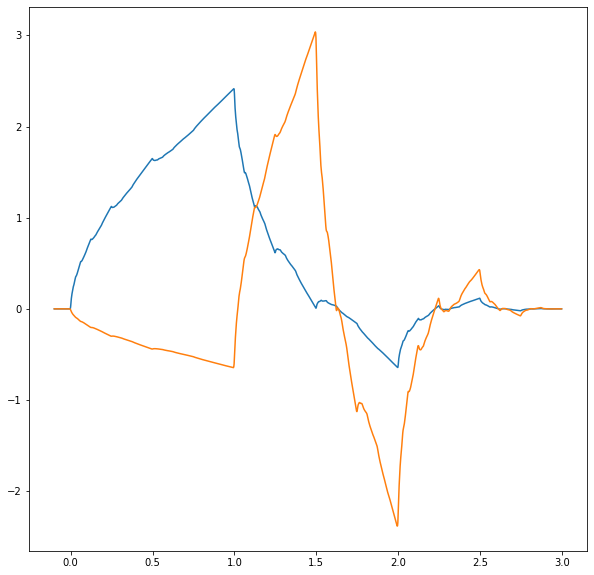

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

h0 = (1 + np.sqrt(3))/(4*np.sqrt(2))
h1 = (3 + np.sqrt(3))/(4*np.sqrt(2))
h2 = (3 - np.sqrt(3))/(4*np.sqrt(2))
h3 = (1 - np.sqrt(3))/(4*np.sqrt(2))

h = [h0, h1, h2, h3]
g = [h3, -h2, h1, -h0]

def starting_guess(x):
    return np.exp(-(x-0.5)**2)

def scaling(filters,x,n):
    result = 0
    if n <= 0:
        result = starting_guess(x)
    else:
        k = 0
        for element in filters:
            result += np.sqrt(2)*element * scaling(filters,2*x-k,n-1)
            k += 1
    return result

def wavelet(h,g,x,n):
    result = 0
    k = 0
    for coeff in g:
            result += np.sqrt(2) * coeff * scaling(h,2*x-k,n-1)
            k += 1
    return result
        
x_array = np.arange(-0.1, 3., 0.002)
w_array = wavelet(h,g,x_array,8)
s_array = scaling(h,x_array,9)

#
plt.figure(figsize=(10,10))

plt.plot(x_array, s_array)
plt.plot(x_array, w_array)